In [1]:
pip install torch

You should consider upgrading via the '/jupyter/venv/bin/python3.8 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
from sentence_transformers import SentenceTransformer, util #for paraphrase_mining
from tqdm import tqdm
from sklearn.metrics.pairwise import cosine_similarity

In [58]:

train = pd.read_csv(r'train.csv')
train.head()

,Содержание,Сервис,Приоритет,Статус,Функциональная группа,Крайний срок,Дата обращения,Тип обращения на момент подачи,Тип обращения итоговый,Решение,Тип переклассификации,Дата восстановления,Дата закрытия обращения,Критичность,Влияние,Система,Место
0,Тест,АРМ,3-Низкий,Отменен,ФГ1,2018-01-24 07:42,2018-01-19 09:27,Запрос,Запрос,Тест,0,NaN,2018-01-19 09:43,4-Нет,3-Малое,База,К
1,Тестовое обращение,АРМ,3-Низкий,Отменен,ФГ1,2018-01-24 10:51,2018-01-19 09:36,Запрос,Запрос,Тест,0,NaN,2018-01-19 09:41,4-Нет,3-Малое,База,К
2,Выполнена разблокировка у/з REGION\*****,Сервис7,2-Средний,Закрыт,ФГ8,2018-01-31 07:51,2018-01-25 22:47,Запрос,Запрос,Выполнена разблокировка у/з Ne_bosS\*********\...,0,2018-01-25 22:47,2018-02-02 07:52,1-Особая,3-Малое,Система7,Место190
3,.Не включается ПК,АРМ,3-Низкий,Закрыт,ФГ390,2018-01-28 05:50,2018-01-25 23:13,Инцидент,Инцидент,Выход из стоя БП. Заменён.,0,2018-01-25 23:55,2018-01-26 00:00,4-Нет,3-Малое,База,Место177
4,"Заявка № ***********, *******************",АРМ,3-Низкий,Закрыт,ФГ303,2018-02-03 02:51,2018-01-25 23:39,Запрос,Запрос,Работы по обращению выполнены,0,2018-01-28 02:54,2018-02-04 07:53,4-Нет,4-Нет влияния,База,Место216


%%time

model = SentenceTransformer('all-MiniLM-L6-v2')
# Two lists of sentences
sentences1 = ['The cat sits outside',
             'A man is playing guitar',
             'The new movie is awesome']

sentences2 = ['The dog plays in the garden',
              'A woman watches TV',
              'The new movie is so great']

#Compute embedding for both lists
embeddings1 = model.encode(sentences1, convert_to_tensor=True)
embeddings2 = model.encode(sentences2, convert_to_tensor=True)

#Compute cosine-similarities
cosine_scores = util.cos_sim(embeddings1, embeddings2)

#Output the pairs with their score
for i in range(len(sentences1)):
    print("{} \t\t {} \t\t Score: {:.4f}".format(sentences1[i], sentences2[i], cosine_scores[i][i]))

In [4]:
train

,Содержание,Сервис,Приоритет,Статус,Функциональная группа,Крайний срок,Дата обращения,Тип обращения на момент подачи,Тип обращения итоговый,Решение,Тип переклассификации,Дата восстановления,Дата закрытия обращения,Критичность,Влияние,Система,Место
0,Тест,АРМ,3-Низкий,Отменен,ФГ1,2018-01-24 07:42,2018-01-19 09:27,Запрос,Запрос,Тест,0,NaN,2018-01-19 09:43,4-Нет,3-Малое,База,К
1,Тестовое обращение,АРМ,3-Низкий,Отменен,ФГ1,2018-01-24 10:51,2018-01-19 09:36,Запрос,Запрос,Тест,0,NaN,2018-01-19 09:41,4-Нет,3-Малое,База,К
2,Выполнена разблокировка у/з REGION\*****,Сервис7,2-Средний,Закрыт,ФГ8,2018-01-31 07:51,2018-01-25 22:47,Запрос,Запрос,Выполнена разблокировка у/з Ne_bosS\*********\...,0,2018-01-25 22:47,2018-02-02 07:52,1-Особая,3-Малое,Система7,Место190
3,.Не включается ПК,АРМ,3-Низкий,Закрыт,ФГ390,2018-01-28 05:50,2018-01-25 23:13,Инцидент,Инцидент,Выход из стоя БП. Заменён.,0,2018-01-25 23:55,2018-01-26 00:00,4-Нет,3-Малое,База,Место177
4,"Заявка № ***********, *******************",АРМ,3-Низкий,Закрыт,ФГ303,2018-02-03 02:51,2018-01-25 23:39,Запрос,Запрос,Работы по обращению выполнены,0,2018-01-28 02:54,2018-02-04 07:53,4-Нет,4-Нет влияния,База,Место216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14798,разблокировка учетной записи пользователя вСе...,Сервис7,2-Средний,Закрыт,ФГ8,2018-02-21 14:17,2018-02-16 13:02,Запрос,Запрос,Личность пользователя идентифицирована\nПричи...,0,2018-02-16 13:02,2018-02-23 14:18,1-Особая,3-Малое,Система7,Место50
14799,Устранение уязвимостей ИБ в соответствии с Пла...,АРМ,3-Низкий,Закрыт,ФГ135,2018-02-21 14:36,2018-02-16 13:07,Запрос,Запрос,Выполнено,0,2018-02-21 12:03,2018-03-07 13:22,4-Нет,3-Малое,База,Место3
14800,Контроль ПУ. Заявка на доступ к портам.,Сервис2,3-Низкий,Закрыт,ФГ315,2018-02-21 14:23,2018-02-16 13:08,Запрос,Запрос,Работы выполнены согласно заявке.,0,2018-02-21 07:01,2018-03-07 08:46,4-Нет,4-Нет влияния,Система2,Место163
14801,Ремонт стульев.,Сервис73,3-Низкий,Закрыт,ФГ159,2018-02-21 14:24,2018-02-16 13:09,Запрос,Запрос,выполнено,0,2018-02-17 10:01,2018-02-24 11:22,4-Нет,4-Нет влияния,Система71,Место3


In [94]:
train['Решение'] = train['Решение             ']

In [140]:
df = pd.DataFrame()
df["text"] = pd.concat([train["Содержание"], train["Решение"]])

df


,text
0,Тест
1,Тестовое обращение
2,Выполнена разблокировка у/з REGION\*****
3,.Не включается ПК
4,"Заявка № ***********, *******************"
...,...
14798,Личность пользователя идентифицирована\nПричи...
14799,Выполнено
14800,Работы выполнены согласно заявке.
14801,выполнено


In [42]:
df.head()

,text
0,Тест
1,Тестовое обращение
2,Выполнена разблокировка у/з REGION\*****
3,.Не включается ПК
4,"Заявка № ***********, *******************"


In [19]:
print(len(train["Содержание"]))
print(len(train["Решение"]))

14803
14803


In [43]:
from sentence_transformers import SentenceTransformer, util
from tqdm import tqdm

In [45]:
%%time

model = SentenceTransformer('distiluse-base-multilingual-cased-v2')
paraphrases = util.paraphrase_mining(model, df["text"], corpus_chunk_size=14803, top_k = 1) #[1000:3000]

id_1 = []
id_2 = []
scores = []


for paraphrase in tqdm(paraphrases):
    score, i, j = paraphrase
    id_1.append(df["text"][i])
    id_2.append(df["text"][j])
    scores.append(score)
    
index_df = pd.DataFrame({'id_1' : id_1,
                         'id_2' : id_2,
                         'score' : scores})   

KeyError: 26557

In [14]:
index_df

,id_1,id_2,score
0,Заявка на предоставление и отзыв прав доступа ...,Заявка на предоставление и отзыв прав доступа ...,1.000000
1,Заявка на предоставление и отзыв прав доступа ...,Заявка на предоставление и отзыв прав доступа ...,1.000000
2,Заявка на предоставление и отзыв прав доступа ...,Заявка на предоставление и отзыв прав доступа ...,1.000000
3,Заявка на предоставление и отзыв прав доступа ...,Заявка на предоставление и отзыв прав доступа ...,1.000000
4,Заявка на предоставление и отзыв прав доступа ...,Заявка на предоставление и отзыв прав доступа ...,1.000000
...,...,...,...
27163,<Бот-наблюдения> высокий ping до Москвы (140 -...,<Бот-наблюдения> Ошибка при запуске,0.356495
27164,(Копия) ТЕСТ Низкий уровень давления в модуле ...,(Адре№007)(Копирование)(Нет)(Нарочно) КМР,0.356415
27165,!Срочно! Пропали контактные данные из личного ...,!Срочно! Сменить пароль локального администратора,0.341419
27166,"Результаты мониторинга температуры, влажности ...",Проверить дозаторы для мыла,0.278236


<Axes: ylabel='Frequency'>

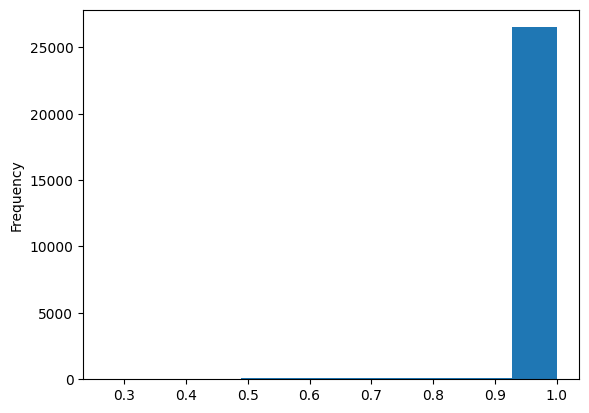

In [16]:
index_df["score"].plot(kind='hist')

In [51]:
!pip install transformers
!pip install umap-learn
!pip install hdbscan

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 1.5 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 14.7 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 22.3 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
     

In [52]:
from transformers import AutoTokenizer, AutoModel
import torch

tokenizer = AutoTokenizer.from_pretrained("DeepPavlov/rubert-base-cased")
model = AutoModel.from_pretrained("DeepPavlov/rubert-base-cased")

Some weights of the model checkpoint at DeepPavlov/rubert-base-cased were not used when initializing BertModel: ['cls.predictions.decoder.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [61]:
train

,Содержание,Сервис,Приоритет,Статус,Функциональная группа,Крайний срок,Дата обращения,Тип обращения на момент подачи,Тип обращения итоговый,Решение,Тип переклассификации,Дата восстановления,Дата закрытия обращения,Критичность,Влияние,Система,Место
0,Тест,АРМ,3-Низкий,Отменен,ФГ1,2018-01-24 07:42,2018-01-19 09:27,Запрос,Запрос,Тест,0,NaN,2018-01-19 09:43,4-Нет,3-Малое,База,К
1,Тестовое обращение,АРМ,3-Низкий,Отменен,ФГ1,2018-01-24 10:51,2018-01-19 09:36,Запрос,Запрос,Тест,0,NaN,2018-01-19 09:41,4-Нет,3-Малое,База,К
2,Выполнена разблокировка у/з REGION\*****,Сервис7,2-Средний,Закрыт,ФГ8,2018-01-31 07:51,2018-01-25 22:47,Запрос,Запрос,Выполнена разблокировка у/з Ne_bosS\*********\...,0,2018-01-25 22:47,2018-02-02 07:52,1-Особая,3-Малое,Система7,Место190
3,.Не включается ПК,АРМ,3-Низкий,Закрыт,ФГ390,2018-01-28 05:50,2018-01-25 23:13,Инцидент,Инцидент,Выход из стоя БП. Заменён.,0,2018-01-25 23:55,2018-01-26 00:00,4-Нет,3-Малое,База,Место177
4,"Заявка № ***********, *******************",АРМ,3-Низкий,Закрыт,ФГ303,2018-02-03 02:51,2018-01-25 23:39,Запрос,Запрос,Работы по обращению выполнены,0,2018-01-28 02:54,2018-02-04 07:53,4-Нет,4-Нет влияния,База,Место216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14798,разблокировка учетной записи пользователя вСе...,Сервис7,2-Средний,Закрыт,ФГ8,2018-02-21 14:17,2018-02-16 13:02,Запрос,Запрос,Личность пользователя идентифицирована\nПричи...,0,2018-02-16 13:02,2018-02-23 14:18,1-Особая,3-Малое,Система7,Место50
14799,Устранение уязвимостей ИБ в соответствии с Пла...,АРМ,3-Низкий,Закрыт,ФГ135,2018-02-21 14:36,2018-02-16 13:07,Запрос,Запрос,Выполнено,0,2018-02-21 12:03,2018-03-07 13:22,4-Нет,3-Малое,База,Место3
14800,Контроль ПУ. Заявка на доступ к портам.,Сервис2,3-Низкий,Закрыт,ФГ315,2018-02-21 14:23,2018-02-16 13:08,Запрос,Запрос,Работы выполнены согласно заявке.,0,2018-02-21 07:01,2018-03-07 08:46,4-Нет,4-Нет влияния,Система2,Место163
14801,Ремонт стульев.,Сервис73,3-Низкий,Закрыт,ФГ159,2018-02-21 14:24,2018-02-16 13:09,Запрос,Запрос,выполнено,0,2018-02-17 10:01,2018-02-24 11:22,4-Нет,4-Нет влияния,Система71,Место3


In [66]:

tokens = tokenizer(data, padding=True, truncation=True, return_tensors="pt")

# Get the embeddings of the data using BERT
with torch.no_grad():
    outputs = model(**tokens)
    embeddings = outputs.last_hidden_state[:, 0, :]

In [133]:
data = train['Решение']

In [144]:
model = SentenceTransformer('distiluse-base-multilingual-cased-v2')
m = model.encode(data)

In [145]:
import pickle
pickle.dump(m, open("bert_model.pkl", "wb"))

In [146]:
from sklearn.cluster import KMeans

inertias = []
ks = range(1, 21)

for k in ks:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(m)
    inertias.append(kmeans.inertia_)

/jupyter/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/jupyter/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/jupyter/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/jupyter/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/jupyter/venv/lib/python3.8/site-packages/sklearn/cluster/_k

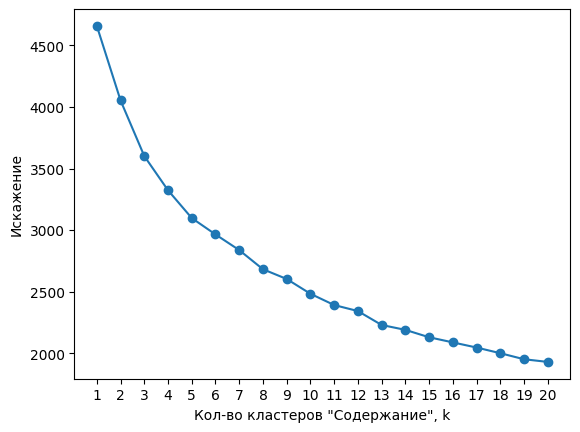

In [147]:
import matplotlib.pyplot as plt
plt.plot(ks, inertias, '-o')
plt.xlabel('Кол-во кластеров "Содержание", k')
plt.ylabel('Искажение')
plt.xticks(ks)
plt.show()

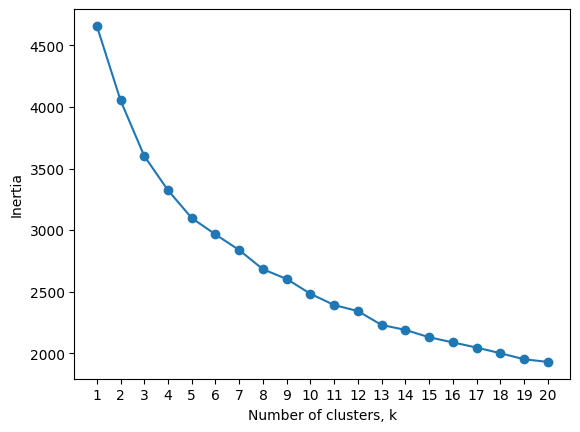

In [106]:
import matplotlib.pyplot as plt
plt.plot(ks, inertias, '-o')
plt.xlabel('Number of clusters Решение, k')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.show()

In [135]:
from sklearn.cluster import KMeans

num_clusters = 13
# Define kmeans model
clustering_model = KMeans(n_clusters=num_clusters)

# Fit the embedding with kmeans clustering.
clustering_model.fit(m)

# Get the cluster id assigned to each news headline.
cluster_assignment = clustering_model.labels_

/jupyter/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [136]:
cluster_assignment

array([1, 1, 0, ..., 7, 1, 2], dtype=int32)

In [137]:
clustered_sentences = [[] for i in range(num_clusters)]
for sentence_id, cluster_id in enumerate(cluster_assignment):
    clustered_sentences[cluster_id].append(data[sentence_id])
for i, cluster in enumerate(clustered_sentences):
    print("Cluster ", i+1)
    print(cluster)
    print("")

Cluster  1
['Выполнена разблокировка у/з Ne_bosS\\*********\nИдентификация пользователя осуществлена.\nОбъект доступа легален.\nПричина нарушения: Несколько раз неправильный ввод пароля', 'Выполнена разблокировка у/з Ne_bosS\\*********\nИдентификация пользователя осуществлена.\nОбъект доступа легален.\nПричина нарушения: Несколько раз неправильный ввод пароля', ' Выполнена разблокировка УЗ Ne_boSS\\ ********       Пользователь идентифицирован, причина блокировки пользователю не ясна', ' Выполнена разблокировка УЗ Ne_boSS\\ ********       Пользователь идентифицирован, причина блокировки пользователю не ясна', 'Выполнен сброс пароля для УЗ ************. Пользователь идентифицирован.', ' Выполнена разблокировка УЗ Ne_boSS\\ ********       Пользователь идентифицирован, причина блокировки пользователю не ясна', 'выполнена разблокировка УЗ Система7 N)_BOSS\\****************. Причина блокировки пользователю не известна.', ' Выполнена разблокировка УЗ Ne_boSS\\ ********       Пользователь иден

In [131]:
df_coderjaniye = pd.DataFrame(clustered_sentences, index=['1', '2','3','4','5','6','7','8','9','10','11','12','13'])
df_coderjaniye

,0,1,2,3,4,5,6,7,8,9,...,3617,3618,3619,3620,3621,3622,3623,3624,3625,3626
1,Письмо Random9838Заявка,Письмо Random9439Заявка,Письмо Random2459Заявка,Письмо Random622Заявка,Письмо RandomNNNN Заявка,Письмо RandomNNNN Заявка,Письмо RandomNNNN Заявка,Письмо RandomNNNN Заявка,"""Письмо Random59597"" - Установить сетевую верс...","""Письмо Random59597"" - Установить сетевую верс...",...,None,None,None,None,None,None,None,None,None,None
2,Заявка на предоставление и отзыв прав доступа ...,Заявка на предоставление и отзыв прав доступа ...,Заявка на предоставление и отзыв прав доступа ...,Заявка на предоставление и отзыв прав доступа ...,Заявка на предоставление и отзыв прав доступа ...,Заявка на предоставление и отзыв прав доступа ...,Заявка на предоставление и отзыв прав доступа ...,Заявка на предоставление и отзыв прав доступа ...,Заявка на предоставление и отзыв прав доступа ...,Заявка на предоставление и отзыв прав доступа ...,...,None,None,None,None,None,None,None,None,None,None
3,Сервисы SNS#1 - Базовые сервисы,Настройка ЭП в Сервис22,Настройка ЭП в Сервис22,Система24. Общие вопросы,Система26,Настройка ЭП в Сервис22,Настройка ЭП в Сервис22,Настройка ЭП в Сервис22,Настройка ЭП в Сервис22,Система26,...,None,None,None,None,None,None,None,None,None,None
4,Необходимо предоставить доступ учетной записи ...,Контроль ПУ. Заявка на доступ к портам.,Контроль ПУ. Заявка на доступ к портам.,Контроль ПУ. Заявка на доступ к портам.,Контроль ПУ. Заявка на доступ к портам.,Необходимо предоставить доступ учетной записи ...,Контроль ПУ. Заявка на доступ к портам.,Контроль ПУ. Заявка на доступ к портам.,Контроль ПУ. Заявка на доступ к портам.,Контроль ПУ. Заявка на доступ к портам.,...,None,None,None,None,None,None,None,None,None,None
5,Замена/добавление Сертификат на сервере Система13,Замена/добавление Сертификат на сервере Система13,Замена/добавление Сертификат на сервере Система13,Замена/добавление Сертификат на сервере Система13,Замена/добавление Сертификат на сервере Система13,Замена/добавление Сертификат на сервере Система13,Замена/добавление Сертификат на сервере Система13,Замена/добавление Сертификат на сервере Система13,Замена/добавление Сертификат на сервере Система13,Замена/добавление Сертификат на сервере Система13,...,None,None,None,None,None,None,None,None,None,None
6,Запрос на изменение учетной записи Система21,Многочисленные обращения пользователей. Отсутс...,Сообщить об ошибке/неисправности Система18,(02.12) Прекращение доступа в Система500,Изменение прав в Система500,Изменение прав в Система500,Система8,Изменение атрибута объекта Система7,Запрос.Система500. Замедление работы Система500,Учет установки ПС в Система43 для ТС инв. ****...,...,None,None,None,None,None,None,None,None,None,None
7,Настройка/Консультация /Техническое обслуживание,Настройка/Консультация /Техническое обслуживание,Настройка/Консультация /Техническое обслуживание,Настройка/Консультация /Техническое обслуживание,Настройка/Консультация /Техническое обслуживание,Настройка/Консультация /Техническое обслуживание,Настройка/Консультация /Техническое обслуживание,Настройка/Консультация /Техническое обслуживание,Дистанционные курсы/тесты,Настройка/Консультация /Техническое обслуживание,...,None,None,None,None,None,None,None,None,None,None
8,перемещение груза,Транспортный шлюз,Транспортный шлюз,Транспортный шлюз,Транспортный шлюз,Транспортный шлюз,Транспортный шлюз,Перемещение имущества,Транспортный шлюз,Транспортный шлюз,...,None,None,None,None,None,None,None,None,None,None
9,Тест,"Заявка № ***********, *******************","Заявка № ***********, *******************","Заявка № ***********, *******************","Заявка № ***********, *******************","Заявка № ***********, *******************","Заявка № ***********, *******************","Заявка № ***********, *******************","Заявка № ***********, *******************","Заявка № ***********, *******************",...,None,None,None,None,None,None,None,None,None,None
10,Запрос на организацию БРМ,Создание запроса,С

In [132]:
df_coderjaniye.to_csv('содержание_класт_13.csv', index=False)

In [138]:
df_solution = pd.DataFrame(clustered_sentences, index=['1', '2','3','4','5','6','7','8','9','10','11','12','13'])
df_solution

,0,1,2,3,4,5,6,7,8,9,...,3683,3684,3685,3686,3687,3688,3689,3690,3691,3692
1,Выполнена разблокировка у/з Ne_bosS\*********\...,Выполнена разблокировка у/з Ne_bosS\*********\...,Выполнена разблокировка УЗ Ne_boSS\ ******** ...,Выполнена разблокировка УЗ Ne_boSS\ ******** ...,Выполнен сброс пароля для УЗ ************. Пол...,Выполнена разблокировка УЗ Ne_boSS\ ******** ...,выполнена разблокировка УЗ Система7 N)_BOSS\**...,Выполнена разблокировка УЗ Ne_boSS\ ******** ...,Выполнена разблокировка УЗ Ne_boSS\ ******** ...,Выполнена разблокировка УЗ Ne_boSS\ ******** ...,...,None,None,None,None,None,None,None,None,None,None
2,Тест,Тест,Исполнено,Выполнено.,Исполнено,Выполнено,Выполнено,Выполнено,Выполнено,Выполнено,...,None,None,None,None,None,None,None,None,None,None
3,Работы по обращению выполнены,Работы по обращению выполнены,Работы по обращению выполнены,Работы по обращению выполнены,Работы по обращению выполнены,Работы по обращению выполнены,Работы по обращению выполнены,Работы по обращению выполнены,Работы по обращению выполнены,Работы по обращению выполнены,...,Работы по обращению выполнены,Работы по обращению выполнены,Работы по обращению выполнены,Работы по обращению выполнены,Работы по обращению выполнены,Работы по обращению выполнены,Работы по обращению выполнены,Работы по обращению выполнены,Работы по обращению выполнены,Работы по обращению выполнены
4,Доступ заблокирован,Доступ заблокирован,Доступ прекращен в зоне своей ответственности,Доступ предоставлен,Доступ предоставлен согласно заявке,Доступ прекращен.,Доступ прекращен.,Доступ прекращен.,Доступ прекращен.,Пользователю предоставлен доступ согласно заяв...,...,None,None,None,None,None,None,None,None,None,None
5,Пользователь разблокирован,Пользователь разблокирован в Система21,заблокирована,заблокирован,Разблокирована УЗ NE_BOSS\**********. Пользова...,УЗ разблокирована,"УЗ разблокирована, пароль изменен",Учетная запись разблокирована.,Учетная запись разблокирована.,Разблокирована УЗ NE_BOSS\**********. Пользова...,...,None,None,None,None,None,None,None,None,None,None
6,Пользователь проинформирован о внесённом сопро...,Подготовлено. Предоставление прав будет выполн...,Пользователь проинформирован о внесённом сопро...,Редакция договора создана пользователем самост...,Пользователю оказана консультация,Пользователь проинформирован о внесённом сопро...,Пользователь проинформирован о внесённом сопро...,Выполнен сброс терминальной сессии пользователя.,Пользователь проинформирован о внесённом сопро...,Оказана консультация по E-mail,...,None,None,None,None,None,None,None,None,None,None
7,Добрый день!\nВ текущем релизе Система18 реали...,Добрый день!\nВ текущем релизе Система18 реали...,Добрый день!\nВ текущем релизе Система18 реали...,Добрый день!\nВ текущем релизе Система18 реали...,Добрый день!\nВ текущем релизе Система18 реали...,Для решения вашего обращения создана новая вер...,Добрый день!\nВ текущем релизе Система18 реали...,Добрый день!\nВ текущем релизе Система18 реали...,Добрый день!\nВ текущем релизе Система18 реали...,Добрый день!\nВ текущем релизе Система18 реали...,...,None,None,None,None,None,None,None,None,None,None
8,Права предоставлены.,Груз переместили.,Права предоставлены.,Права предоставлены согласно ОРД.,Права предоставлены.,ПО установлено. Сеть настроена.,Права предоставлены.,Выполнены настройки.,Права предоставлены.,Права предоставлены.,...,None,None,None,None,None,None,None,None,None,None
9,Выход из стоя БП. Заменён.,Выполнен ремонт системы охлаждения блока питан...,Сбой репликации данных на сервера Система304 с...,Приложенный АТФ зарегистрирован в Сисстема398 ...,Выполнена разблокировка и пересчет эталонов КЦ.,Добрый день. Контрагент добавлен в справочник ...,"выполнено переименование УЗ инициатора, оказан...",Поток *********** отработал штатно.,Выполнен пересчет задания КЦ.,"""В соответствии с п.******** Регламента вза...",...,None,None,None,None,None,None,None,None,None,None
10,Сертификат-файл зарегистрирован,Сертификат-файл зарегистрирован,Сертифик

In [139]:
df_solution.to_csv('решение_класт_13.csv', index=False)